In [1]:
import numpy as np
import pandas as pd
import json
import requests
from bs4 import BeautifulSoup
import time

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
user_agent = "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/100.0.4896.127 Safari/537.36"

In [ ]:
page = ['5', '6', '7']
data_list = []
updowns_list = []
for i in page:
  url =f'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page={i}'
  info = {'referer': 'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_USDKRW&page=1',
        'user-agent': user_agent}
  time.sleep(2)
  resp = requests.get(url, headers=info)
  html = BeautifulSoup(resp.text, 'html.parser')
  for i in html.select('div.section_exchange.section_today tbody tr td'):
    data_list.append(i.text.replace('\n','').replace('\t',''))

  for i in html.select('div.section_exchange.section_today tbody tr td.num img'):
    updowns_list.append(i.attrs['alt'])

print(data_list)

['2022.02.24', '1,204.50', ' 12.50', '1,225.57', '1,183.43', '1,216.30', '1,192.70', 'N/A', '1,192.03', '2022.02.23', '1,192.00', '  1.00', '1,212.86', '1,171.14', '1,203.60', '1,180.40', 'N/A', '1,179.75', '2022.02.22', '1,193.00', ' 0.50', '1,213.87', '1,172.13', '1,204.60', '1,181.40', 'N/A', '1,180.75', '2022.02.21', '1,192.50', '  3.00', '1,213.36', '1,171.64', '1,204.10', '1,180.90', 'N/A', '1,180.25', '2022.02.18', '1,195.50', '  2.00', '1,216.42', '1,174.58', '1,207.20', '1,183.80', 'N/A', '1,183.15', '2022.02.17', '1,197.50', '  0.50', '1,218.45', '1,176.55', '1,209.20', '1,185.80', 'N/A', '1,185.16', '2022.02.16', '1,198.00', ' 0.50', '1,218.96', '1,177.04', '1,209.70', '1,186.30', 'N/A', '1,185.67', '2022.02.15', '1,197.50', ' 0.00', '1,218.45', '1,176.55', '1,209.20', '1,185.80', 'N/A', '1,185.16', '2022.02.14', '1,197.50', '  2.00', '1,218.45', '1,176.55', '1,209.20', '1,185.80', 'N/A', '1,185.16', '2022.02.11', '1,199.50', ' 3.00', '1,220.49', '1,178.51', '1,211.20', '1,1

In [ ]:
print(updowns_list)

['상승', '하락', '상승', '하락', '하락', '하락', '상승', '보합', '하락', '상승', '상승', '하락', '하락', '상승', '하락', '하락', '상승', '상승', '상승', '상승', '상승', '상승', '보합', '하락', '보합', '상승', '상승', '하락', '하락', '하락']


In [ ]:
dollar_data = np.array(data_list).reshape(-1, 9)





In [ ]:
df = pd.DataFrame(data=dollar_data, columns=["날짜", "매매기준율", "전일대비", "사실 때", '파실 때', "보내실 때", "받으실 때", "TC", "외화수표 사실때"])

In [ ]:
df.set_index('날짜', inplace=True)

In [ ]:
df.head()

,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때,TC,외화수표 사실때
날짜,,,,,,,,
2022.02.24,"1,204.50",12.50,"1,225.57","1,183.43","1,216.30","1,192.70",N/A,"1,192.03"
2022.02.23,"1,192.00",1.00,"1,212.86","1,171.14","1,203.60","1,180.40",N/A,"1,179.75"
2022.02.22,"1,193.00",0.50,"1,213.87","1,172.13","1,204.60","1,181.40",N/A,"1,180.75"
2022.02.21,"1,192.50",3.00,"1,213.36","1,171.64","1,204.10","1,180.90",N/A,"1,180.25"
2022.02.18,"1,195.50",2.00,"1,216.42","1,174.58","1,207.20","1,183.80",N/A,"1,183.15"


In [ ]:
df.drop('TC', axis=1, inplace=True)


In [ ]:
df.head()

,매매기준율,사실 때,파실 때,보내실 때,받으실 때,외화수표 사실때,전일대비
날짜,,,,,,,
2022.02.24,"1,204.50","1,225.57","1,183.43","1,216.30","1,192.70","1,192.03",12.50
2022.02.23,"1,192.00","1,212.86","1,171.14","1,203.60","1,180.40","1,179.75",1.00
2022.02.22,"1,193.00","1,213.87","1,172.13","1,204.60","1,181.40","1,180.75",0.50
2022.02.21,"1,192.50","1,213.36","1,171.64","1,204.10","1,180.90","1,180.25",3.00
2022.02.18,"1,195.50","1,216.42","1,174.58","1,207.20","1,183.80","1,183.15",2.00


In [ ]:
updown = df.pop('전일대비')

In [ ]:
df['전일대비'] = updown

In [ ]:
df.shape

(30, 7)

In [ ]:
updown_marker_dollar = np.array(updowns_list).reshape(30,-1)

In [ ]:
df['상승/하락'] = updown_marker_dollar

In [ ]:
df_dollar = df

In [ ]:
df_dollar.head()

,매매기준율,사실 때,파실 때,보내실 때,받으실 때,외화수표 사실때,전일대비,상승/하락
날짜,,,,,,,,
2022.02.24,"1,204.50","1,225.57","1,183.43","1,216.30","1,192.70","1,192.03",12.50,하락
2022.02.23,"1,192.00","1,212.86","1,171.14","1,203.60","1,180.40","1,179.75",1.00,하락
2022.02.22,"1,193.00","1,213.87","1,172.13","1,204.60","1,181.40","1,180.75",0.50,하락
2022.02.21,"1,192.50","1,213.36","1,171.64","1,204.10","1,180.90","1,180.25",3.00,하락
2022.02.18,"1,195.50","1,216.42","1,174.58","1,207.20","1,183.80","1,183.15",2.00,하락


In [ ]:
page = ['5', '6', '7']
data_list = []
updowns_list = []
for i in page:
  url =f'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_EURKRW&page={i}'
  info = {'referer': 'https://finance.naver.com/marketindex/exchangeDailyQuote.naver?marketindexCd=FX_EURKRW&page=1',
        'user-agent': user_agent}
  time.sleep(2)
  resp = requests.get(url, headers=info)
  html = BeautifulSoup(resp.text, 'html.parser')
  for i in html.select('div.section_exchange.section_today tbody tr td'):
    data_list.append(i.text.replace('\n','').replace('\t',''))

  for i in html.select('div.section_exchange.section_today tbody tr td.num img'):
    updowns_list.append(i.attrs['alt'])

print(data_list)

['2022.02.24', '1,346.39', '  6.65', '1,373.18', '1,319.60', '1,359.85', '1,332.93', 'N/A', '1,332.40', '2022.02.23', '1,353.04', '  1.25', '1,379.96', '1,326.12', '1,366.57', '1,339.51', 'N/A', '1,338.98', '2022.02.22', '1,354.29', '  0.03', '1,381.24', '1,327.34', '1,367.83', '1,340.75', 'N/A', '1,340.22', '2022.02.21', '1,354.32', '  3.77', '1,381.27', '1,327.37', '1,367.86', '1,340.78', 'N/A', '1,340.25', '2022.02.18', '1,358.09', '  4.13', '1,385.11', '1,331.07', '1,371.67', '1,344.51', 'N/A', '1,343.98', '2022.02.17', '1,362.22', '  1.34', '1,389.32', '1,335.12', '1,375.84', '1,348.60', 'N/A', '1,348.07', '2022.02.16', '1,363.56', ' 4.82', '1,390.69', '1,336.43', '1,377.19', '1,349.93', 'N/A', '1,349.40', '2022.02.15', '1,358.74', ' 3.95', '1,385.77', '1,331.71', '1,372.32', '1,345.16', 'N/A', '1,344.63', '2022.02.14', '1,354.79', '  6.76', '1,381.75', '1,327.83', '1,368.33', '1,341.25', 'N/A', '1,340.72', '2022.02.11', '1,361.55', '  6.71', '1,388.64', '1,334.46', '1,375.16', '1

In [ ]:
euro_data = np.array(data_list).reshape(-1, 9)

In [ ]:
updown_marker_euro = np.array(updowns_list).reshape(30, -1)

In [ ]:
df = pd.DataFrame(data=euro_data, columns=["날짜", "매매기준율", "전일대비", "사실 때", '파실 때', "보내실 때", "받으실 때", "TC", "외화수표 사실때"])

In [ ]:
df.head()

,날짜,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때,TC,외화수표 사실때
0,2022.02.24,"1,346.39",6.65,"1,373.18","1,319.60","1,359.85","1,332.93",N/A,"1,332.40"
1,2022.02.23,"1,353.04",1.25,"1,379.96","1,326.12","1,366.57","1,339.51",N/A,"1,338.98"
2,2022.02.22,"1,354.29",0.03,"1,381.24","1,327.34","1,367.83","1,340.75",N/A,"1,340.22"
3,2022.02.21,"1,354.32",3.77,"1,381.27","1,327.37","1,367.86","1,340.78",N/A,"1,340.25"
4,2022.02.18,"1,358.09",4.13,"1,385.11","1,331.07","1,371.67","1,344.51",N/A,"1,343.98"


In [ ]:
df.set_index('날짜', inplace=True)

In [ ]:
df.drop('TC', axis=1, inplace=True)

In [ ]:
df.head()

,날짜,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때,외화수표 사실때
0,2022.02.24,"1,346.39",6.65,"1,373.18","1,319.60","1,359.85","1,332.93","1,332.40"
1,2022.02.23,"1,353.04",1.25,"1,379.96","1,326.12","1,366.57","1,339.51","1,338.98"
2,2022.02.22,"1,354.29",0.03,"1,381.24","1,327.34","1,367.83","1,340.75","1,340.22"
3,2022.02.21,"1,354.32",3.77,"1,381.27","1,327.37","1,367.86","1,340.78","1,340.25"
4,2022.02.18,"1,358.09",4.13,"1,385.11","1,331.07","1,371.67","1,344.51","1,343.98"


In [ ]:
df['상승/하락'] = updown_marker_euro

In [ ]:
df_euro = df

In [ ]:
df_euro.head()

,매매기준율,전일대비,사실 때,파실 때,보내실 때,받으실 때,외화수표 사실때,상승/하락
날짜,,,,,,,,
2022.02.24,"1,346.39",6.65,"1,373.18","1,319.60","1,359.85","1,332.93","1,332.40",하락
2022.02.23,"1,353.04",1.25,"1,379.96","1,326.12","1,366.57","1,339.51","1,338.98",하락
2022.02.22,"1,354.29",0.03,"1,381.24","1,327.34","1,367.83","1,340.75","1,340.22",하락
2022.02.21,"1,354.32",3.77,"1,381.27","1,327.37","1,367.86","1,340.78","1,340.25",하락
2022.02.18,"1,358.09",4.13,"1,385.11","1,331.07","1,371.67","1,344.51","1,343.98",하락


In [ ]:
# 1.11 ~ 2.24
page = list(range(9,16))
data_list = []
updowns_list = []
for i in page:
  url =f'https://finance.naver.com/marketindex/oilDailyQuote.naver?marketindexCd=OIL_GSL&page={i}'
  info = {'referer': 'https://finance.naver.com/marketindex/oilDailyQuote.naver?marketindexCd=OIL_GSL&page=8',
        'user-agent': user_agent}
  time.sleep(2)
  resp = requests.get(url, headers=info)
  html = BeautifulSoup(resp.text, 'html.parser')
  for i in html.select('div.section_exchange2 table.tbl_exchange.today tbody tr td'):
    data_list.append(i.text.replace('\n','').replace('\t',''))

  for i in html.select('div.section_exchange2 table.tbl_exchange.today tbody tr td.num img'):
    updowns_list.append(i.attrs['alt'])



In [ ]:
print(data_list)


['2022.02.28', '1,758.87', ' 2.56', ' + 0.15%', '2022.02.27', '1,756.31', ' 1.56', ' + 0.09%', '2022.02.26', '1,754.75', ' 3.91', ' + 0.22%', '2022.02.25', '1,750.84', ' 4.64', ' + 0.27%', '2022.02.24', '1,746.20', ' 3.15', ' + 0.18%', '2022.02.23', '1,743.05', ' 3.69', ' + 0.21%', '2022.02.22', '1,739.36', ' 2.88', ' + 0.17%', '2022.02.21', '1,736.48', ' 2.64', ' + 0.15%', '2022.02.20', '1,733.84', ' 1.53', ' + 0.09%', '2022.02.19', '1,732.31', ' 2.92', ' + 0.17%', '2022.02.18', '1,729.39', ' 3.30', ' + 0.19%', '2022.02.17', '1,726.09', ' 3.40', ' + 0.20%', '2022.02.16', '1,722.69', ' 4.05', ' + 0.24%', '2022.02.15', '1,718.64', ' 4.52', ' + 0.26%', '2022.02.14', '1,714.12', ' 3.66', ' + 0.21%', '2022.02.13', '1,710.46', ' 2.23', ' + 0.13%', '2022.02.12', '1,708.23', ' 3.91', ' + 0.23%', '2022.02.11', '1,704.32', ' 3.43', ' + 0.20%', '2022.02.10', '1,700.89', ' 3.88', ' + 0.23%', '2022.02.09', '1,697.01', ' 5.20', ' + 0.31%', '2022.02.08', '1,691.81', ' 5.27', ' + 0.31%', '2022.02.07'

In [ ]:
print(updowns_list)

['상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '상승']


In [ ]:
oil_data = np.array(data_list).reshape(-1,4)

In [ ]:

oil_data.shape

(49, 4)

In [ ]:
updown_marker_oil = np.array(updowns_list).reshape(49, -1)

In [ ]:
updown_marker_oil.shape

(49, 1)

In [ ]:
df = pd.DataFrame(data=oil_data, columns=['날짜','종가','전일대비','등락률']).set_index('날짜')

In [ ]:
df['상승/하락'] = updown_marker_oil

In [ ]:
df.head()

,종가,전일대비,등락률,상승/하락
날짜,,,,
2022.02.28,"1,758.87",2.56,+ 0.15%,상승
2022.02.27,"1,756.31",1.56,+ 0.09%,상승
2022.02.26,"1,754.75",3.91,+ 0.22%,상승
2022.02.25,"1,750.84",4.64,+ 0.27%,상승
2022.02.24,"1,746.20",3.15,+ 0.18%,상승


In [ ]:
df_sample = df.drop(df.index[:4])

In [ ]:
df_oil = df_sample

In [ ]:
df_oil.head()

,종가,전일대비,등락률,상승/하락
날짜,,,,
2022.02.24,"1,746.20",3.15,+ 0.18%,상승
2022.02.23,"1,743.05",3.69,+ 0.21%,상승
2022.02.22,"1,739.36",2.88,+ 0.17%,상승
2022.02.21,"1,736.48",2.64,+ 0.15%,상승
2022.02.20,"1,733.84",1.53,+ 0.09%,상승


In [ ]:
# 1.11 ~ 2.24
page = list(range(6,12))
data_list = []
updowns_list = []
for i in page:
  url =f'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=CMDT_GC&fdtc=2&page={i}'
  info = {'referer': 'https://finance.naver.com/marketindex/worldDailyQuote.naver?marketindexCd=CMDT_GC&fdtc=2&page=5',
        'user-agent': user_agent}
  time.sleep(2)
  resp = requests.get(url, headers=info)
  html = BeautifulSoup(resp.text, 'html.parser')
  for i in html.select('div.section_exchange2 table.tbl_exchange.today tbody tr td'):
    data_list.append(i.text.replace('\n','').replace('\t',''))

  for i in html.select('div.section_exchange2 table.tbl_exchange.today tbody tr td.num img'):
    updowns_list.append(i.attrs['alt'])

In [ ]:
print(data_list)

['2022.03.03', '1,934.40', ' 13.50', ' +0.70%', '2022.03.02', '1,920.90', ' 21.50', '-1.10%', '2022.03.01', '1,942.40', ' 43.00', ' +2.26%', '2022.02.28', '1,899.40', ' 12.90', ' +0.68%', '2022.02.25', '1,886.50', ' 38.90', '-2.02%', '2022.02.24', '1,925.40', ' 16.00', ' +0.83%', '2022.02.23', '1,909.40', ' 3.00', ' +0.15%', '2022.02.22', '1,906.40', ' 7.60', ' +0.40%', '2022.02.18', '1,898.80', ' 2.20', '-0.11%', '2022.02.17', '1,900.70', ' 30.50', ' +1.63%', '2022.02.16', '1,870.20', ' 15.40', ' +0.83%', '2022.02.15', '1,854.80', ' 13.20', '-0.70%', '2022.02.14', '1,868.00', ' 27.20', ' +1.47%', '2022.02.11', '1,840.80', ' 4.60', ' +0.25%', '2022.02.10', '1,836.20', ' 1.00', ' +0.05%', '2022.02.09', '1,835.20', ' 8.60', ' +0.47%', '2022.02.08', '1,826.60', ' 6.00', ' +0.32%', '2022.02.07', '1,820.60', ' 14.00', ' +0.77%', '2022.02.04', '1,806.60', ' 3.60', ' +0.19%', '2022.02.03', '1,803.00', ' 6.20', '-0.34%', '2022.02.02', '1,809.20', ' 8.90', ' +0.49%', '2022.02.01', '1,800.30', '

In [ ]:
print(updowns_list)

['상승', '하락', '상승', '상승', '하락', '상승', '상승', '상승', '하락', '상승', '상승', '하락', '상승', '상승', '상승', '상승', '상승', '상승', '상승', '하락', '상승', '상승', '상승', '하락', '하락', '하락', '상승', '상승', '하락', '하락', '상승', '하락', '하락', '하락', '상승', '상승', '상승', '상승', '하락', '상승', '상승', '하락']


In [ ]:
gold_data = np.array(data_list).reshape(-1,4)

In [ ]:
gold_data.shape

(42, 4)

In [ ]:
updown_marker_gold = np.array(updowns_list).reshape(42, -1)

In [ ]:
updown_marker_gold.shape

(42, 1)

In [ ]:
df_gold = pd.DataFrame(data=gold_data, columns=['날짜','종가','전일대비','등락율']).set_index('날짜')

In [ ]:
df_gold['상승/하락'] = updown_marker_gold

In [ ]:
df_gold.head()

,종가,전일대비,등락율,상승/하락
날짜,,,,
2022.03.03,"1,934.40",13.50,+0.70%,상승
2022.03.02,"1,920.90",21.50,-1.10%,하락
2022.03.01,"1,942.40",43.00,+2.26%,상승
2022.02.28,"1,899.40",12.90,+0.68%,상승
2022.02.25,"1,886.50",38.90,-2.02%,하락


In [ ]:
df_gold = df_gold.drop(df_gold.index[:5])

In [ ]:
df_gold.shape

(37, 4)

In [ ]:
def make_int(x):
  return float(x.replace(",", ""))

df_dollar['매매기준율'].apply(make_int)

날짜
2022.02.24    1204.5
2022.02.23    1192.0
2022.02.22    1193.0
2022.02.21    1192.5
2022.02.18    1195.5
2022.02.17    1197.5
2022.02.16    1198.0
2022.02.15    1197.5
2022.02.14    1197.5
2022.02.11    1199.5
2022.02.10    1196.5
2022.02.09    1196.0
2022.02.08    1198.5
2022.02.07    1200.5
2022.02.04    1199.5
2022.02.03    1204.5
2022.01.28    1209.0
2022.01.27    1203.5
2022.01.26    1198.5
2022.01.25    1198.0
2022.01.24    1197.5
2022.01.21    1192.5
2022.01.20    1191.0
2022.01.19    1191.0
2022.01.18    1192.5
2022.01.17    1192.5
2022.01.14    1190.0
2022.01.13    1185.5
2022.01.12    1192.5
2022.01.11    1194.0
Name: 매매기준율, dtype: float64

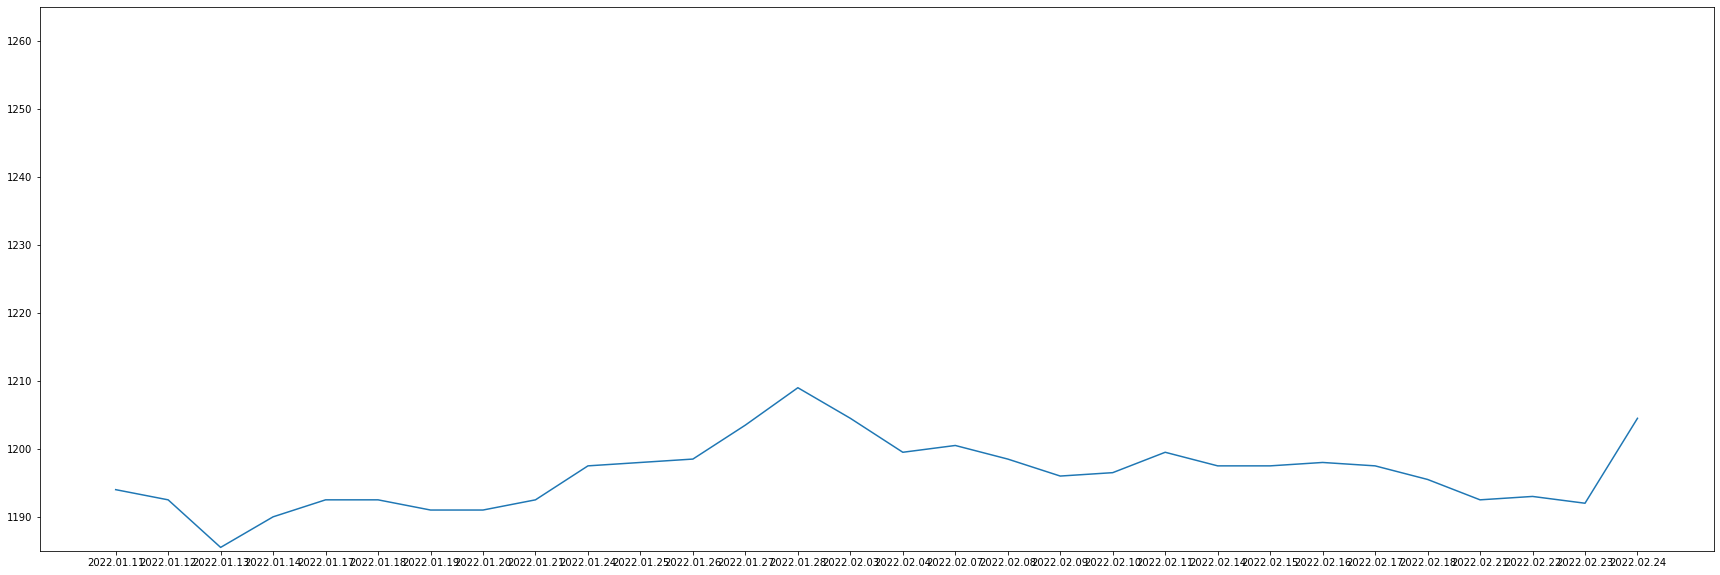

In [ ]:

plt.figure(figsize=(30,10))
plt.plot(df_dollar['매매기준율'].apply(make_int).sort_index())

plt.ylim([1185, 1265])     # Y축의 범위: [ymin, ymax]
plt.show()



In [ ]:
df_dollar.to_json('/content/drive/MyDrive/변치웅강사님 파이썬/advance/dollar_won_data.json')

In [ ]:
df_euro.to_json('/content/drive/MyDrive/변치웅강사님 파이썬/advance/euro_won_data.json')
df_oil.to_json('/content/drive/MyDrive/변치웅강사님 파이썬/advance/oil_won_data.json')
df_gold.to_json('/content/drive/MyDrive/변치웅강사님 파이썬/advance/gold_dollar_data.json')